In [1156]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model as lm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import operator
from itertools import product
import itertools
import statsmodels.api as sm
import cvxopt as opt
from cvxopt import blas, solvers

float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
pd.options.display.float_format = '{:20,.3f}'.format

In [597]:
file = pd.ExcelFile('mergedData_v4.xlsx')
data = file.parse(file.sheet_names[0])
data.sort_values(by = ['Date'],ascending = [True])
# data2 = data.loc[:,['Date','FED_Eff','CPI','Unemployment']]

# m = data2.loc[pd.notnull(data2.Change)].copy()
m = data.copy()

p=1

m = m.loc[range(0,m.shape[0],p),]


m['logFED_Eff'] = np.log(m['FED_Eff']/100+1)*100
m['Change_logFED_Eff'] = m['logFED_Eff'].diff()
m['Change_logFED_Eff'].values[0:-1,] = m['Change_logFED_Eff'].values[1:,]
m['ChangePct_logFED_Eff'] = m['Change_logFED_Eff']/m['logFED_Eff']
m['Inflation'] = (m['CPI'].diff()/m['CPI'])*100
m['Inflation'].values[0:-1,] = m['Inflation'].values[1:,]
m['Change_Unemployment'] = m['Unemployment'].diff()
m['Change_Unemployment'].values[0:-1,] = m['Change_Unemployment'].values[1:,]

# m['logChangePct_logFED_Eff'] = np.log(m['ChangePct_logFED_Eff']+1)
m.fillna(0,inplace = True)
m = m.loc[m.index[0:-2],]

In [406]:
m

,Date,MXWO0CD,MXWO0CS,MXWO0EN,MXWO0FN,MXWO0HC,MXWO0IN,MXWO0IT,MXWO0MT,MXWO0TC,...,Wheat,Gold,CPI,Unemployment,Date.1,logFED_Eff,Change_logFED_Eff,ChangePct_logFED_Eff,Inflation,Change_Unemployment
0,1995-01-31,57.25,45.52,56.73,58.85,32.43,77.38,28.10,99.74,43.20,...,0.00,377.47,150.50,5.60,1995-01-31,5.38,0.37,0.07,0.27,-0.20
1,1995-02-28,57.73,46.43,57.55,59.50,33.28,77.10,29.40,100.51,43.18,...,0.00,376.68,150.90,5.40,1995-02-28,5.75,0.06,0.01,0.20,0.00
2,1995-03-31,61.13,48.81,60.92,61.79,34.86,80.61,31.61,105.41,43.81,...,0.00,391.40,151.20,5.40,1995-03-31,5.81,0.07,0.01,0.40,0.40
3,1995-04-30,61.50,49.94,63.54,64.67,35.75,83.30,33.92,109.34,44.38,...,0.00,387.58,151.80,5.80,1995-04-30,5.87,-0.04,-0.01,0.20,-0.20
4,1995-05-31,61.55,51.22,63.78,65.69,36.21,82.11,34.54,107.45,45.06,...,0.00,384.56,152.10,5.60,1995-05-31,5.84,-0.01,-0.00,0.20,0.00
5,1995-06-30,61.91,51.37,61.94,63.69,37.57,81.22,37.00,106.05,45.79,...,0.00,384.60,152.40,5.60,1995-06-30,5.83,-0.14,-0.02,0.13,0.10
6,1995-07-31,65.11,52.22,64.04,67.65,38.95,85.81,39.75,112.44,46.86,...,0.00,383.62,152.60,5.70,1995-07-31,5.69,-0.10,-0.02,0.20,0.00
7,1995-08-31,63.49,51.05,61.53,65.23,38.35,83.87,39.81,109.12,47.78,...,0.00,381.52,152.90,5.70,1995-08-31,5.58,0.06,0.01,0.13,-0.10
8,1995-09-30,63.83,53.51,62.29,67.09,41.02,84.14,39.80,109.55,50.43,...,0.00,383.90,153.10,5.60,1995-09-30,5.64,-0.04,-0.01,0.26,-0.10
9,1995-10-31,61.59,54.17,62.28,65.56,42.20,82.10,40.39,105.75,49.96,...,0.00,382.84,153.50,5.50,1995-10-31,5.60,0.04,0.01,0.13,0.10


In [617]:
data.columns

Index(['Date', 'MXWO0CD', 'MXWO0CS', 'MXWO0EN', 'MXWO0FN', 'MXWO0HC',
       'MXWO0IN', 'MXWO0IT', 'MXWO0MT', 'MXWO0TC', 'MXWO0UT', 'MXEF0CD',
       'MXEF0CS', 'MXEF0EN', 'MXEF0FN', 'MXEF0HC', 'MXEF0IN', 'MXEF0IT',
       'MXEF0MT', 'MXEF0TC', 'MXEF0UT', 'MZUSL', 'MZUSM', 'MZUSS', 'MXEALC',
       'MXEAMC', 'MXEASC', 'MXEFLC', 'MXEFMC', 'MXEFSC', 'FED', 'FED_Eff',
       'Change', 'LIBOR1Y', 'USTreasury', 'USCorporate', 'AsianPacificAgg',
       'EuroAgg', 'EMAgg', 'MXEF', 'MXEA ', 'MSCI', 'SPX', 'RUI', 'RUT',
       'SXXP', 'RUA', 'NI225', 'SPTSX', 'HSI', 'SHCOMP', 'DAX', 'CAC', 'FTSE',
       'FTSEMIB', 'CPI', 'Unemployment', 'CommAgricultural', 'CommEnergy',
       'CommFood&Beverage', 'CommInduInput', 'CommMetal', 'Date.1',
       'logFED_Eff', 'Change_logFED_Eff', 'ChangePct_logFED_Eff', 'Inflation',
       'Change_Unemployment'],
      dtype='object')

In [599]:
target = ['Change_logFED_Eff','Inflation','Change_Unemployment']

feature = ['CPI','Unemployment','RUA','FED_Eff']

# data = m[['Date']+target+feature]
data = m
target = target
N_state = 6
itemax = 100
llambda = 0.000000001
tol = 0.1

In [1135]:
def solveMMGR(data,target,N_state,itemax = 100,llambda = 0.00000001,tol = 0.01, initBETA = None, disp = True):
    df = data.copy()

    # Set number of dimension
    Dout = len(target)
    Din = len(feature)

    # Initialize transition matrix
    P = np.identity(N_state)

    # Initialize Gaussian distribution for each state
#     MU = np.random.rand(N_state,D)
    if initBETA == None:
        BETA = {}
    else:
        BETA = initBETA
    
    SIGMA = {}
    for i in range(N_state):
        BETA[i] = np.random.rand((Din+1),Dout)/100
        aRandomMatrix = np.random.rand(Dout,Dout)
        SIGMA[i] = (np.dot(aRandomMatrix,aRandomMatrix.transpose())+np.identity(Dout))*100

    likelihoodList =[]
    
    # Iteratively solve the problem
    ite = 0
#     for ite in range(itemax):
    while True:
        
        #show progress
        if ite%10 == 0 and disp:
            print(str(100*(ite)/itemax)+'%')

        # initialize psi and responsibility for the first iteration
        if ite==0:
            psiList = [];
            rList = [];

        # Loop through every state
        for i in range(N_state):
            df['psi'+str(i)] = 0.0000
            if ite==0:
                    psiList.append('psi'+str(i))
            for j in df.index:
                # compute the density of each data point for every Gaussian core
                lh = st.multivariate_normal.pdf(df.loc[j,target].values,
                                                mean =np.dot(np.append(df.loc[j,feature].values,1.00),
                                                             BETA[i]),
                                                cov = SIGMA[i])                    
                df.set_value(j,'psi'+str(i),lh)
                

        # Initialize the responsibility of each data point for every Gaussian core
        if ite==0:
            for i in range(N_state):    
                df['r'+str(i)] = df['psi'+str(i)]/df[psiList].sum(axis = 1)
                if ite==0:
                    rList.append('r'+str(i))

        df[rList].values[0,:] = df[psiList].values[0,:]/np.sum(df[psiList].values[0,:])
        
        # E(Expectation) Step:
        ## Update the Likelihood condition on the responsibility of the previous data point
        conditionalLikelihood = np.dot(df[rList].values[0:-1,],P)*df[psiList].values[1:]
        ## Update responsibility using the updated likelihood
        r = conditionalLikelihood/np.sum(conditionalLikelihood,axis =1)[:,np.newaxis]
        df.loc[df.index[1]:,rList] = r
        
        # L(Likelihood) Step:
        ## Update the mean of the Gaussian Distribution for each state
        for i in range(N_state):
            label = 'r'+str(i)
            X = sm.add_constant(df[feature].values, prepend=False)
            modWLS = sm.WLS(df[target].values,X,weights = df[label].values/sum(df[label].values))
            resWLS = modWLS.fit()
            BETA[i] = resWLS.params

#         MU = np.dot(df[rList].values.transpose(),df[target].values)/(np.sum(df[rList].values,axis=0)[:,np.newaxis])
        
        likelihoodList.append(np.sum(np.multiply(conditionalLikelihood,df[rList].values[1:,:])))
        
        ## Update the cov matrix of the Gaussian Distribution for each state
        for i in range(N_state):
            label = 'r'+str(i)
            Q = np.diag(df[label]/np.sum(df[label]))
            X = sm.add_constant(df[feature].values, prepend=False)
            currentPrediction = np.dot(X,BETA[i])
            error = df[target].values-currentPrediction
            SIGMA[i] = np.dot(np.squeeze(np.dot(Q,error).transpose()),np.squeeze(error))+np.identity(D)*llambda
        
        # Recalculate the transition matrix based on the updated responsibility
        for j,k in product(range(N_state),range(N_state)):
            P[j,k] = np.sum(df[['r'+str(j)]].values[0:-1]*df[['r'+str(k)]].values[1:],axis = 0)/np.sum(df[['r'+str(j)]].values[0:-1],axis = 0)
    
    
        if ite >=10:
            if (likelihoodList[(len(likelihoodList)-1)]-likelihoodList[(len(likelihoodList)-2)])<tol:
                break
        
        if ite>=itemax:
            break
        ite = ite +1
        
    prediction =  np.zeros(((len(target)),df.shape[0], N_state))
    weightedPrediction = [np.zeros((df.shape[0],(len(target)-1)))]*N_state

    for i in range(len(target)):
        for k in range(N_state):
            X = sm.add_constant(df[feature].values, prepend=False)
            prediction[i,:,k] = np.dot(X,BETA[k])[:,i]
        weightedPrediction[i] = np.sum(df[rList].values*prediction[i,:,:],axis =1)
                           
    return df, MU, SIGMA, P, likelihoodList, rList, weightedPrediction, BETA

In [514]:
def get_shrunk_covariance_matrix(x, shrink=None):
    """Computes a covariance matrix that is "shrunk" towards a structured estimator. Code
        borrows heavily from the MATLAB implementation available by the authors online.

    Parameters
    ----------
    x : N x N sample covariance matrix of stock returns
    shrink : given shrinkage intensity factor; if none, code calculates

    Returns
    -------
    tuple : pd.DataFrame which contains the shrunk covariance matrix
            : float shrinkage intensity factor

    """
    if x is None:
        raise ValueError('No covariance matrix defined')

    if type(x) == pd.core.frame.DataFrame:
        cov = x.as_matrix()
    elif type(x) == np.ndarray:
        cov = x
    else:
        raise ValueError('Covariance matrix passed must be numpy.ndarray or pd.DataFrame')

    if shrink is not None:
        shrinkage = shrink

    index = x.index
    columns = x.columns

    [t, n] = np.shape(cov)
    meanx = cov.mean(axis=0)
    cov = cov - np.tile(meanx, (t, 1))

    sample = (1.0 / t) * np.dot(cov.T, cov)

    var = np.diag(sample)
    sqrtvar = np.sqrt(var)

    a = np.tile(sqrtvar, (n, 1))
    rho = (sum(sum(sample / (a * a.T))) - n) / (n*(n-1))

    prior = rho * (a * a.T)
    prior[np.eye(t, n)==1] = var

    # Frobenius-norm of matrix cov, sqrt(sum(diag(dot(cov.T, cov))))
    # have to research this
    c = np.linalg.norm(sample-prior, 'fro')**2
    y = cov**2.0
    p = np.dot((1.0 / t), sum(sum(np.dot(y.T, y))))-sum(sum(sample**2.0))
    rdiag = np.dot((1.0 / t), sum(sum(y**2.0))) - sum(var**2.0)
    v = np.dot((cov**3.0).T, cov) / t - ((var*sample).T)
    v[np.eye(t, n)==1] = 0.0
    roff = sum(sum(v * (a  / a.T)))
    r = rdiag + np.dot(rho, roff)

    # compute shrinkage constant
    k = (p - r) / c
    shrinkage = max(0.0, min(1.0, k/t))
    sigma = np.dot(shrinkage, prior) + np.dot((1 - shrinkage), sample)
        
    return pd.DataFrame(sigma, index=index, columns=columns), shrinkage

In [1011]:
# checkThis = 2
# print(1-np.cov(weightedPrediction[checkThis]-df[target].values[:,checkThis])/np.cov(df[target].values[:,checkThis]))
# plt.plot(weightedPrediction[checkThis])
# plt.plot(df[target].values[:,checkThis])

In [1015]:
# df.columns

In [580]:
def getClusterVar(cov,cItems):
    cov_=cov.loc[cItems,cItems]
    ivp = 1./np.diag(cov_)
    ivp/=sum(ivp)
    w_ = ivp.reshape(-1,1)
    cVar = np.dot(np.dot(w_.T,cov_),w_)
    return cVar[0,0]

In [953]:
import collections

def Tree():
    return collections.defaultdict(Tree)

In [1227]:
def solveMvo(returnsDf):
    n = returnsDf.shape[1]
    returns = returnsDf.values.T
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    mvoPfl = pd.DataFrame(np.asarray(wt).T,columns = returnsDf.columns)
    return mvoPfl, returns, risks

In [954]:
Asset = ['MXWO0CD', 'MXWO0CS', 'MXWO0EN', 'MXWO0FN', 'MXWO0HC',
       'MXWO0IN', 'MXWO0IT', 'MXWO0MT', 'MXWO0TC', 'MXWO0UT', 'MXEF0CD',
       'MXEF0CS', 'MXEF0EN', 'MXEF0FN', 'MXEF0HC', 'MXEF0IN', 'MXEF0IT',
       'MXEF0MT', 'MXEF0TC', 'MXEF0UT','CommAgricultural', 'CommEnergy',
       'CommFood&Beverage', 'CommInduInput', 'CommMetal',
      'USTreasury', 'USCorporate', 'EMAgg']

t = Tree()
t[0][0] = [['MXWO0CD', 'MXWO0CS', 'MXWO0EN', 'MXWO0FN', 'MXWO0HC',
       'MXWO0IN', 'MXWO0IT', 'MXWO0MT', 'MXWO0TC', 'MXWO0UT', 'MXEF0CD',
       'MXEF0CS', 'MXEF0EN', 'MXEF0FN', 'MXEF0HC', 'MXEF0IN', 'MXEF0IT',
       'MXEF0MT', 'MXEF0TC', 'MXEF0UT',],
      [ 'CommAgricultural', 'CommEnergy','CommFood&Beverage', 'CommInduInput', 'CommMetal'],
      ['USTreasury', 'USCorporate', 'EMAgg']]

t[1][0] = [['MXWO0CD', 'MXWO0CS', 'MXWO0EN', 'MXWO0FN', 'MXWO0HC',
       'MXWO0IN', 'MXWO0IT', 'MXWO0MT', 'MXWO0TC', 'MXWO0UT'], 
      ['MXEF0CD','MXEF0CS', 'MXEF0EN', 'MXEF0FN', 'MXEF0HC', 
       'MXEF0IN', 'MXEF0IT','MXEF0MT', 'MXEF0TC', 'MXEF0UT',]]
t[1][1] = [['CommAgricultural'], ['CommEnergy'],
       ['CommFood&Beverage'], ['CommInduInput'], ['CommMetal']]
t[1][2] = [['USTreasury'], ['USCorporate'], ['EMAgg']]


t[2][0] = [['MXWO0CD'], ['MXWO0CS'], ['MXWO0EN'], ['MXWO0FN'], ['MXWO0HC'],
       ['MXWO0IN'], ['MXWO0IT'], ['MXWO0MT'], ['MXWO0TC'], ['MXWO0UT']]
t[2][1] = [['MXEF0CD'],['MXEF0CS'], ['MXEF0EN'], ['MXEF0FN'], ['MXEF0HC'], 
       ['MXEF0IN'], ['MXEF0IT'], ['MXEF0MT'], ['MXEF0TC'], ['MXEF0UT']]



In [954]:
Asset = ['MXWO0CD', 'MXWO0CS', 'MXWO0EN', 'MXWO0FN', 'MXWO0HC',
       'MXWO0IN', 'MXWO0IT', 'MXWO0MT', 'MXWO0TC', 'MXWO0UT', 'MXEF0CD',
       'MXEF0CS', 'MXEF0EN', 'MXEF0FN', 'MXEF0HC', 'MXEF0IN', 'MXEF0IT',
       'MXEF0MT', 'MXEF0TC', 'MXEF0UT','CommAgricultural', 'CommEnergy',
       'CommFood&Beverage', 'CommInduInput', 'CommMetal',
      'USTreasury', 'USCorporate', 'EMAgg']

t = Tree()
t[0][0] = [['MXWO0CD', 'MXWO0CS', 'MXWO0EN', 'MXWO0FN', 'MXWO0HC',
       'MXWO0IN', 'MXWO0IT', 'MXWO0MT', 'MXWO0TC', 'MXWO0UT', 'MXEF0CD',
       'MXEF0CS', 'MXEF0EN', 'MXEF0FN', 'MXEF0HC', 'MXEF0IN', 'MXEF0IT',
       'MXEF0MT', 'MXEF0TC', 'MXEF0UT',],
      [ 'CommAgricultural', 'CommEnergy','CommFood&Beverage', 'CommInduInput', 'CommMetal'],
      ['USTreasury', 'USCorporate', 'EMAgg']]

t[1][0] = [['MXWO0CD', 'MXWO0CS', 'MXWO0EN', 'MXWO0FN', 'MXWO0HC',
       'MXWO0IN', 'MXWO0IT', 'MXWO0MT', 'MXWO0TC', 'MXWO0UT'], 
      ['MXEF0CD','MXEF0CS', 'MXEF0EN', 'MXEF0FN', 'MXEF0HC', 
       'MXEF0IN', 'MXEF0IT','MXEF0MT', 'MXEF0TC', 'MXEF0UT',]]
t[1][1] = [['CommAgricultural'], ['CommEnergy'],
       ['CommFood&Beverage'], ['CommInduInput'], ['CommMetal']]
t[1][2] = [['USTreasury'], ['USCorporate'], ['EMAgg']]


t[2][0] = [['MXWO0CD'], ['MXWO0CS'], ['MXWO0EN'], ['MXWO0FN'], ['MXWO0HC'],
       ['MXWO0IN'], ['MXWO0IT'], ['MXWO0MT'], ['MXWO0TC'], ['MXWO0UT']]
t[2][1] = [['MXEF0CD'],['MXEF0CS'], ['MXEF0EN'], ['MXEF0FN'], ['MXEF0HC'], 
       ['MXEF0IN'], ['MXEF0IT'], ['MXEF0MT'], ['MXEF0TC'], ['MXEF0UT']]



In [1012]:
hrp = pd.DataFrame(np.zeros([len(m.Date),len(Asset)]),columns = selectAsset,index = m.Date)

BETA = None

In [1323]:
# reset everything
mvo = pd.DataFrame(np.zeros([len(m.Date),len(Asset)]),columns = selectAsset,index = m.Date)
i_d_start = 24

# Loop starts here

In [1334]:
# initBETA = BETA
# np.logical_and(m.Date>=beginDate,m.Date<=endDate)
opt.solvers.options['show_progress'] = False
for i_d in range(i_d_start,len(m.Date)):
    
    print((i_d-24)/(len(m.Date)-24)*100)
        
    beginDate = m.Date[(i_d-24)]
    endDate = m.Date[(i_d-1)]
    ind = m[np.logical_and(m.Date>=beginDate,m.Date<=endDate)].index
    
    
#     dataForEM = m.loc[ind,]
#     df, MU, SIGMA, P, likelihoodList, rList, weightedPrediction, BETA = solveMMGR(data = dataForEM,
#                                                                        target = target,N_state = 6, tol = 1,
#                                                                                   itemax = 50,
#                                                                                   initBETA=BETA, disp = False)
#     currentData = df[Asset+rList+['Date']]
    

#     nextStateProb = np.dot(df[rList].values[-1,:],P)

#     COV = {}
#     sigma = {}
#     shrinkage = {}

#     for i in range(len(rList)):
#         COV[i] = pd.DataFrame(np.cov(np.transpose(A.values[1:,]),aweights = currentData[rList[i]].values[1:,]),
#                               index = A.columns,
#                               columns = A.columns)
#         sigma[i],shrinkage[i] = get_shrunk_covariance_matrix(COV[i])

#     gCOV = pd.DataFrame(np.cov(np.transpose(A.values[1:,])),index = A.columns, columns = A.columns)
#     gSigma,gShrinkage = get_shrunk_covariance_matrix(gCOV)

#     weightSigma = sigma[0]*0
#     for i in range(len(sigma)):
#         weightSigma+=sigma[i]*nextStateProb[i]

#     # Compute HRP===========================================
#     w = pd.DataFrame(np.ones([1,len(Asset)]),columns = selectAsset)
#     alpha = pd.DataFrame(np.ones([1,len(Asset)]),columns = selectAsset)

#     for i in range(3):
#         for j in range(len(t[i])):
#             L = t[i][j]
#             v = [0]*len(L)
#             count = 0
#             for cItem in L:
#                 v[count] = getClusterVar(weightSigma,cItem)
#                 count+=1

#             inv_v = np.array(v)
#             stand_inv_v = inv_v/np.sum(inv_v)

#             count = 0
#             for cItem in L:
#                 alpha[cItem] = stand_inv_v[count]
#                 w[cItem]*=alpha[cItem]
#                 count+=1

#     hrp.set_value(max(currentData.Date),Asset,w.values)
#     #====================end===================================
    
    #Compute Markowitz========================================
    dataForMvo = m.loc[ind,]
    A = dataForMvo[Asset].pct_change(periods=1, fill_method='pad', limit=None, freq=None)*100
    mvoPfl, mvoReturn, mvoRisks = solveMvo(A.loc[A.index[1]:,])
    mvo.set_value(max(dataForMvo.Date),Asset,mvoPfl.values)
    #====================end===================================

0.0
0.41841004184100417
0.8368200836820083
1.2552301255230125
1.6736401673640167
2.092050209205021
2.510460251046025
2.928870292887029
3.3472803347280333
3.765690376569038
4.184100418410042
4.602510460251046
5.02092050209205
5.439330543933055
5.857740585774058
6.2761506276150625
6.694560669456067
7.112970711297072
7.531380753138076
7.949790794979079
8.368200836820083
8.786610878661087
9.205020920502092
9.623430962343097
10.0418410041841
10.460251046025103
10.87866108786611
11.297071129707113
11.715481171548117
12.133891213389122
12.552301255230125
12.97071129707113
13.389121338912133
13.807531380753138
14.225941422594143
14.644351464435147
15.062761506276152
15.481171548117153
15.899581589958158
16.317991631799163
16.736401673640167
17.154811715481173
17.573221757322173
17.99163179916318
18.410041841004183
18.828451882845187
19.246861924686193
19.665271966527197
20.0836820083682
20.502092050209207
20.920502092050206
21.338912133891213
21.75732217573222
22.17573221757322
22.594142259414

In [1326]:
risklessBondReturnM = m['USTreasury'].pct_change(periods=1, fill_method='pad', limit=None, freq=None).values[1:,]+1

In [1327]:
returnM = m[Asset].pct_change(periods=1, fill_method='pad', limit=None, freq=None).values[1:,]+1

In [1346]:
returnHrp = np.sum(returnM*hrp.values[1:,],axis = 1)
returnMvo = np.sum(returnM*mvo.values[1:,],axis = 1)

In [1347]:
returnHrp = returnHrp[returnHrp>0]
returnMvo = returnMvo[returnMvo>0]

In [1348]:
cummuReturnHrp = [np.product(returnHrp[0:i]) for i in range(len(returnHrp))]
cummuReturnMvo = [np.product(returnMvo[0:i]) for i in range(len(returnMvo))]
cummuReturnPureBonds = [np.product(risklessBondReturnM[0:i]) for i in range(risklessBondReturnM.shape[0])]

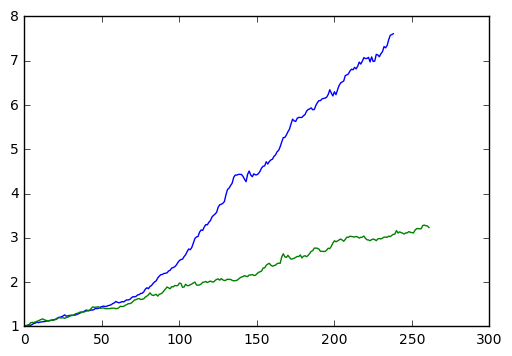

In [1349]:
plt.plot(cummuReturnMvo)
plt.plot(cummuReturnPureBonds)

In [1350]:
rf = (np.average(risklessBondReturnM)-1)*12/p

In [1351]:
np.product(returnMvo)**(12/len(returnMvo))

1.1067816098725267

In [1352]:
mean_mvo = (np.average(returnMvo)-1)*12/p

In [1353]:
np.cov(returnMvo)*12

0.0014207037580923525

In [1354]:
std_mvo = np.std(returnMvo)*((12/p)**(0.5))

In [1355]:
Sharpe_mvo = (mean_mvo-rf)/std_mvo
Sharpe_mvo

1.3023037992283977

In [1137]:
writer = pd.ExcelWriter('hrp_v1.xlsx')
hrp.to_excel(writer,'Sheet1')
writer.save()

In [1297]:
writer = pd.ExcelWriter('mvo_v1.xlsx')
mvo.to_excel(writer,'Sheet1')
writer.save()

In [1357]:
np.linalg.cond(weightSigma)

5268.2403769745224